优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特
征数据。
缺点：可能会产生过度匹配问题。
适用数据类型：数值型和标称型

# 决策树伪代码
检测数据集中的每个子项是否属于同一分类： 
If so return 类标签；
Else 
 寻找划分数据集的最好特征
 划分数据集
 创建分支节点
for 每个划分的子集
 调用函数createBranch并增加返回结果到分支节点中
return 分支节点

# 决策树决策流程
(1) 收集数据：可以使用任何方法。
(2) 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。
(3) 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。
(4) 训练算法：构造树的数据结构。
(5) 测试算法：使用经验树计算错误率。
(6) 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据
的内在含义。

In [1]:
from math import log
def calcShannonEnt(dataSet):
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurrence
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1

    # 对于 label 标签的占比，求出 label 标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [3]:
myDat,labels = createDataSet()

In [4]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
labels

['no surfacing', 'flippers']

In [6]:
print(calcShannonEnt(myDat))

0.9709505944546686


In [7]:
myDat[0][-1]='maybe'

In [8]:
calcShannonEnt(myDat)

0.9709505944546686

# 按照给定特征划分数据集

In [9]:
def splitDataSet(dataSet, index, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        index 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            music_media.append(object) 向列表中添加一个对象object
            music_media.extend(sequence) 把一个序列seq的内容添加到列表中 (跟 += 在list运用类似， music_media += sequence)
            1、使用append的时候，是将object看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将sequence看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            music_media = []
            music_media.extend([1,2,3])
            print music_media
            #结果：
            #[1, 2, 3]
            
            music_media.append([4,5,6])
            print music_media
            #结果：
            #[1, 2, 3, [4, 5, 6]]
            
            music_media.extend([7,8,9])
            print music_media
            #结果：
            #[1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [10]:
# 看例子说话
myDat,labels = createDataSet()

In [11]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [12]:
splitDataSet(myDat,0,1)#这里就是查找第0列等于1的除去第0列的数据

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [13]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [14]:
#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # 数据集的原始信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取对应的feature下的所有数据
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算概率
            prob = len(subDataSet)/float(len(dataSet))
            # 计算信息熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [15]:
#https://www.cnblogs.com/kyrieng/p/8694705.html
#https://blog.csdn.net/z735640642/article/details/86166587

In [16]:
chooseBestFeatureToSplit(myDat)#这里的结果可以看出需要按照第0个特征来是信息增益最大的

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8


0

问：上面的 newEntropy 为什么是根据子集计算的呢？
答：因为我们在根据一个特征计算香农熵的时候，该特征的分类值是相同，这个特征这个分类的香农熵为 0；
这就是为什么计算新的香农熵的时候使用的是子集

In [17]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        else:
            classCount[vote] += 1
        sortedClassCount = sorted(classCount.item(),key=lambda x:x[1],reverse = True)
        return sortedClassCount[0][0]

In [18]:
# 类似于KNN中的投票机制
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print 'myTree', value, myTree
    return myTree

In [20]:
labels_copy = labels[:]
labels_copy2 = labels[:]
mytree = createTree(myDat,labels_copy)
tree = createTree(myDat,labels_copy2)

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0


In [20]:
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [21]:
print(labels)

['no surfacing', 'flippers']


In [22]:
def classify(inputTree, featLabels, testVec):
    '''
    函数功能：
            对测试实例进行分类
    参数说明：
            inputTree__已经训练好的决策树
            featLabels__特征标签类别
            testVec__测试示例
    函数返回：
            分类结果  
    '''
    # python3.x中input.key()[0]返回的是dict_keys，不是list，这里注意区别（书上的代码是python2.x）
    firstStr = list(inputTree.keys())[0]  # 获得决策树第一个节点
    #print(featLabels)
    secondDict = inputTree[firstStr]      # 获取下一个字典
    print(secondDict)
    print(firstStr)
    featIndex = featLabels.index(firstStr)    # 将标签字符串转换为索引(第一个节点所在列的索引)
    for key in secondDict.keys():
        #print(testVec[featIndex])
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [23]:
classify(mytree,labels,[1,0])

{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
no surfacing
{0: 'no', 1: 'yes'}
flippers


'no'

In [24]:
print(labels)

['no surfacing', 'flippers']


In [25]:
#使用matploblib注解绘制树形图
#使用matploblib注解绘制树形图
import matplotlib.pyplot as plt

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']#中文注释
decisionNode = dict(boxstyle='sawtooth',fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.axl.annotate(nodeTxt,xy=parentPt,xycoords="axes fraction",xytext=centerPt,textcoords="axes fraction"
                           ,va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)# https://blog.csdn.net/leaf_zizi/article/details/82886755
def createPlot():
    fig = plt.figure(1,facecolor="white")
    fig.clf
    createPlot.axl = plt.subplot(111,facecolor="white")
    plotNode(U"决策节点",(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode(U"叶子节点",(0.8,0.1),(0.3,0.8),decisionNode)
    plt.show()
#https://blog.csdn.net/u013038499/article/details/52449768

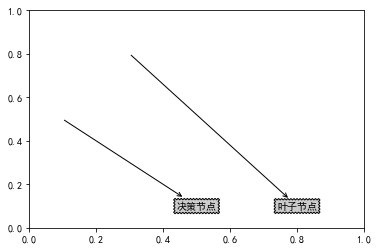

In [26]:
createPlot()

In [35]:
#获得叶子节点数目
def getNumLeafs(myTree):
    '''
    函数功能：
            递归计算叶子节点数目
    函数参数：
            字典形式的决策树
    函数返回：
            叶子节点数目
    '''
    numLeafs = 0                                           # 初始化叶子节点的数目
    print(list(myTree.keys()))
    firstStr = list(myTree.keys())[0]                      # 获取决策树的第一个节点
    secondDict = myTree[firstStr]                          # 获取决策树的第二个节点  
    for key in secondDict.keys():                          
        if type(secondDict[key]).__name__ == 'dict':       # 若该节点为字典形式 
            numLeafs += getNumLeafs(secondDict[key])       # 若为字典，则递归计算新分支叶节点数 
        else:
            numLeafs += 1                                  # 若不是字典，则此节点为叶子节点 
    return numLeafs                                        # 返回叶子节点数目

# 函数测试
# labels = ['no surfacing', 'flippers', 'labels']
# labels_copy2 = labels[:]
# print(myDat)
# print(labels)
# tree = createTree(myDat,labels_copy2)

In [36]:
print(getNumLeafs(tree))

['no surfacing']
['flippers']
4


In [29]:
#得到树的深度
def getTreeDepth(myTree):
    '''
    函数功能：
            递归计算决策树的深度
    函数参数：
            myTree__字典形式的决策树
    函数返回：
            决策树的最大深度
    '''
    maxDepth = 0                                            
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
getTreeDepth(mytree)

2

In [30]:
#使用文本标注
decisionNode = dict(boxstyle = 'sawtooth', fc = '0.8')    # 设置中间节点的格式 
leafNode = dict(boxstyle = 'round4', fc = '0.8')          # 设置叶子节点的格式
arrow_args = dict(arrowstyle = '<-')                      # 定义箭头格式
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    '''
    函数功能：
            绘制节点
    参数说明：
            nodeTxt__节点名
            centerPt__文本位置
            parentPt__标注的箭头位置
            nodeType__节点格式
    '''
    createPlot.ax1.annotate(nodeTxt,                                          # 文本内容  
                           xy = parentPt, xycoords = 'axes fraction',         # 注释的起始位置，坐标系
                           xytext = centerPt, textcoords = 'axes fraction',   # 文本的起始位置
                           va = 'center', ha = 'center',                      # 水平对齐，垂直对齐
                           bbox = nodeType,                                   # 节点格式
                           arrowprops = arrow_args)                           # 箭头格式 

In [31]:
#标注有向边
def plotMidText(cntrPt, parentPt, txtString):
    '''
    函数功能：
            标注有向边内容
    参数说明：
            cntrpt、parentPt__计算标注位置
            txtString__标注内容
    '''
    xMid = (parentPt[0] - cntrPt[0])/ 2.0 + cntrPt[0]        # 计算文本位置的横坐标
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]         # 计算文本位置的纵坐标
    createPlot.ax1.text(xMid,                                # 文本位置的横坐标 
                        yMid,                                # 文本位置的纵坐标
                        txtString)                           # 标注内容

In [32]:
def plotTree(myTree, parentPt, nodeTxt):
    '''
    函数功能：
            绘制决策树
    函数参数：
            myTree__决策树
            parentPt__标注的内容
            nodeTxt__节点名称
    '''
    numLeafs = getNumLeafs(myTree)                          # 获取决策树叶结点数目，决定了树的宽度 
    depth = getTreeDepth(myTree)                            # 获取决策树层数，决定了树的高度
    firstStr = next(iter(myTree))                           # 获得决策树第一个节点
    cntrPt = (plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)#确定中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                  # 标注有向边内容
    plotNode(firstStr, cntrPt, parentPt, decisionNode)      # 绘制节点
    secondDict = myTree[firstStr]                           # 获取下一个字典
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD     # y偏移值
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':        # 该结点是否为字典
            plotTree(secondDict[key], cntrPt, str(key))     # 如果是字典则不是叶结点，递归调用继续绘制
        else:                                
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW                          # x偏移值
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)  # 绘制节点
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))                # 标注有向边内容
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD          

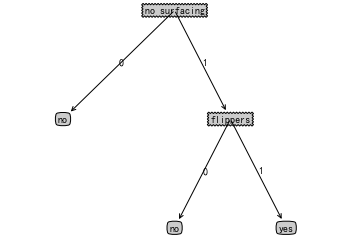

In [33]:
def createPlot(inTree):
    '''
    函数功能：绘制完整的决策树
    参数说明：
            inTree__决策树
    '''
    fig = plt.figure(1, facecolor='white')                      #创建画布
    fig.clf()                                                   #清空画布
    axprops = dict(xticks=[], yticks=[])   
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) # 除去x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                # 获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))               # 获取决策树深度
    plotTree.xOff = -0.5/plotTree.totalW                        # x偏移的初始值
    plotTree.yOff = 1.0                                         # y偏移的初始值
    plotTree(inTree, (0.5,1.0), '')                             # 绘制决策树
    plt.show()                                                  #显示图像

# 测试函数
# labels = ['no surfacing', 'flippers', 'labels']
# tree = createTree(dataSet, labels)
createPlot(tree)

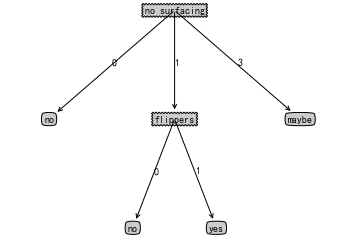

In [34]:
tree['no surfacing'][3] = 'maybe'
createPlot(tree)

In [37]:
#测试
def classify(inputTree, featLabels, testVec):
    '''
    函数功能：
            对测试实例进行分类
    参数说明：
            inputTree__已经训练好的决策树
            featLabels__特征标签类别
            testVec__测试示例
    函数返回：
            分类结果  
    '''
    # python3.x中input.key()[0]返回的是dict_keys，不是list，这里注意区别（书上的代码是python2.x）
    firstStr = list(inputTree.keys())[0]  # 获得决策树第一个节点
    #print(featLabels)
    secondDict = inputTree[firstStr]      # 获取下一个字典
    print(secondDict)
    print(firstStr)
    featIndex = featLabels.index(firstStr)    # 将标签字符串转换为索引(第一个节点所在列的索引)
    for key in secondDict.keys():
        #print(testVec[featIndex])
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [51]:
def storeTree(inputTree, filename):
    '''
    函数功能：
            将决策树保存在磁盘中
    函数参数：
            inputTree__决策树
            filename__文件名
    '''
    import pickle                    # 导入pickle模块
    # 按照书中这里写的'w'，将会报错write() argument must be str,not bytes
    # 所以这里将改写为'wb'
    fw = open(filename, 'wb')        # 创建一个可以“写入”的文件
    pickle.dump(inputTree, fw)       # pickle的dump函数将决策树写入文件中  
    fw.close()                       # 写完成后关闭文件
def gradTree(filename):
    '''
    函数功能：
            将树从磁盘中取出
    函数参数：
            filename__文件名
    '''
    import pickle                     # 导入pickle模块
    fr = open(filename, 'rb')         # 使用'rb'读出数据
    return pickle.load(fr)    

# 函数测试
# labels = ['no surfacing', 'flippers', 'labels']
# tree = createTree(dataSet, labels)
storeTree(tree, 'classifer.json')
#gradTree('classifer.json')

In [21]:
fr = open('./3.DecisionTree/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLable = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLable)
lensesTree

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature= 0 1.0 0.0
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.918295834

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'pre': 'soft',
      'young': 'soft'}},
    'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}}}}}}}}